In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
%matplotlib inline

import statsmodels.api as sm

In [246]:
df=pd.read_csv("database.csv")
df.dtypes

SCHOOL_ID                 int64
SCHOOL_NAME              object
SCHOOL_TYPE               int64
ACADEMIC_YEAR             int64
SPORT_CODE                int64
SPORT_NAME               object
NCAA_DIVISION             int64
NCAA_SUBDIVISION          int64
NCAA_CONFERENCE          object
FOURYEAR_ATHLETES         int64
FOURYEAR_SCORE            int64
FOURYEAR_ELIGIBILITY    float64
FOURYEAR_RETENTION      float64
2014_ATHLETES             int64
2014_SCORE                int64
2014_ELIGIBILITY        float64
2014_RETENTION          float64
2013_ATHLETES             int64
2013_SCORE                int64
2013_ELIGIBILITY        float64
2013_RETENTION          float64
2012_ATHLETES             int64
2012_SCORE                int64
2012_ELIGIBILITY        float64
2012_RETENTION          float64
2011_ATHLETES             int64
2011_SCORE                int64
2011_ELIGIBILITY        float64
2011_RETENTION          float64
2010_ATHLETES             int64
2010_SCORE                int64
2010_ELI

In [247]:
df=df.drop_duplicates(keep='first')


In [248]:
df['FOURYEAR_ATHLETES'].sample(50)

6416     52
77      132
3463     62
1980     99
1290    104
3908     32
4323     21
1139     52
3775     74
3327     50
5763     47
4909     53
549      62
4026     23
5525    108
3353     54
5721    140
74       52
541      76
4096     32
890      24
6173     84
423      51
1461     48
4267    111
1400     36
6497     98
1625     62
5539     53
3088     30
2285     98
6498     51
977      63
1854     56
4566     54
4802     35
1932    367
4898     28
4047     78
3388    105
257     123
573      76
1981     60
6383     47
3336     48
1654     43
3546     71
5920    143
4563     38
3751     60
Name: FOURYEAR_ATHLETES, dtype: int64

In [249]:
df.columns

Index(['SCHOOL_ID', 'SCHOOL_NAME', 'SCHOOL_TYPE', 'ACADEMIC_YEAR',
       'SPORT_CODE', 'SPORT_NAME', 'NCAA_DIVISION', 'NCAA_SUBDIVISION',
       'NCAA_CONFERENCE', 'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE',
       'FOURYEAR_ELIGIBILITY', 'FOURYEAR_RETENTION', '2014_ATHLETES',
       '2014_SCORE', '2014_ELIGIBILITY', '2014_RETENTION', '2013_ATHLETES',
       '2013_SCORE', '2013_ELIGIBILITY', '2013_RETENTION', '2012_ATHLETES',
       '2012_SCORE', '2012_ELIGIBILITY', '2012_RETENTION', '2011_ATHLETES',
       '2011_SCORE', '2011_ELIGIBILITY', '2011_RETENTION', '2010_ATHLETES',
       '2010_SCORE', '2010_ELIGIBILITY', '2010_RETENTION', '2009_ATHLETES',
       '2009_SCORE', '2009_ELIGIBILITY', '2009_RETENTION', '2008_ATHLETES',
       '2008_SCORE', '2008_ELIGIBILITY', '2008_RETENTION', '2007_ATHLETES',
       '2007_SCORE', '2007_ELIGIBILITY', '2007_RETENTION', '2006_ATHLETES',
       '2006_SCORE', '2006_ELIGIBILITY', '2006_RETENTION', '2005_ATHLETES',
       '2005_SCORE', '2005_ELIGIBILITY', '

In [250]:
df.drop(df[df['2004_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2005_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2006_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2007_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2008_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2009_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2010_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2011_RETENTION'] ==-99.0000].index, inplace=True)
df.drop(df[df['2012_RETENTION'] ==-99.0000].index, inplace=True)
df.drop('ACADEMIC_YEAR',axis=1,inplace=True)
df.drop('SCHOOL_TYPE',axis=1,inplace=True)
df = df.reset_index(drop=True)
df.sample(5) 

# i know this can be looped, but too lazy atm

,SCHOOL_ID,SCHOOL_NAME,SPORT_CODE,SPORT_NAME,NCAA_DIVISION,NCAA_SUBDIVISION,NCAA_CONFERENCE,FOURYEAR_ATHLETES,FOURYEAR_SCORE,FOURYEAR_ELIGIBILITY,...,2006_ELIGIBILITY,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION
4416,218973,Wofford College,34,"Women's Track, Indoor",1,2,Southern Conference,43,1000,1.0,...,1.0000,1.0000,10,1000,1.0,1.0000,11,955,1.0000,0.9091
1757,157289,University of Louisville,25,Women's Golf,1,1,Atlantic Coast Conference,38,1000,1.0,...,0.9333,0.9333,7,962,1.0,0.9231,8,967,1.0000,0.9333
5146,233374,University of Richmond,31,Women's Soccer,1,2,Atlantic 10 Conference,58,1000,1.0,...,1.0000,0.9677,17,984,1.0,0.9677,18,1000,1.0000,1.0000
4417,218973,Wofford College,35,"Women's Track, Outdoor",1,2,Southern Conference,43,1000,1.0,...,1.0000,1.0000,10,1000,1.0,1.0000,11,955,1.0000,0.9091
569,122931,Santa Clara University,21,Women's Cross Country,1,3,West Coast Conference,48,1000,1.0,...,1.0000,1.0000,9,1000,1.0,1.0000,10,949,0.9487,0.9487


In [255]:
df['avg_scores']=df[['2014_SCORE','2013_SCORE','2012_SCORE','2011_SCORE','2010_SCORE','2009_SCORE','2008_SCORE','2007_SCORE','2006_SCORE','2005_SCORE','2004_SCORE']].mean(axis=1)
avgscore=df[['NCAA_CONFERENCE','SPORT_NAME','avg_scores','NCAA_DIVISION']]


<AxesSubplot:ylabel='avg_scores'>

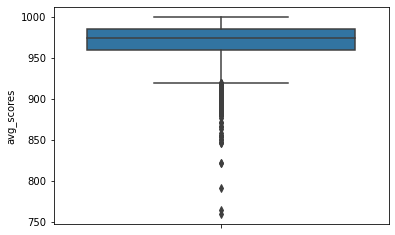

In [256]:

sns.boxplot(y=df['avg_scores'])

In [257]:
df['NCAA_CONFERENCE'].unique()

array(['Southwestern Athletic Conference', 'Conference USA',
       'Gulf South Conference', 'Southeastern Conference',
       'Ohio Valley Conference', 'Southern Conference',
       'Sun Belt Conference', 'Great Northwest Athletic Conference',
       'Pac-12 Conference', 'Big Sky Conference', 'Big West Conference',
       'Western Athletic Conference', 'Mountain West Conference',
       'West Coast Conference', 'Southern Collegiate Athletic Conference',
       'The Summit League', 'Northeast Conference',
       'American Athletic Conference',
       'Metro Atlantic Athletic Conference', 'America East Conference',
       'The Ivy League', 'Mid-Eastern Athletic Conference',
       'Colonial Athletic Association', 'Patriot League',
       'Atlantic 10 Conference', 'Big East Conference',
       'Atlantic Coast Conference', 'Atlantic Sun Conference',
       'Peach Belt Conference', 'Missouri Valley Conference',
       'Horizon League', 'Big Ten Conference', 'Mid-American Conference',
     

In [258]:
df[['SPORT_CODE','SPORT_NAME']].sample(50)

,SPORT_CODE,SPORT_NAME
1993,32,Women's Swimming
224,13,Men's Tennis
4538,15,"Men's Track, Outdoor"
1283,14,"Men's Track, Indoor"
5272,15,"Men's Track, Outdoor"
907,1,Baseball
4644,35,"Women's Track, Outdoor"
240,2,Men's Basketball
1388,13,Men's Tennis
2516,34,"Women's Track, Indoor"


In [259]:
athletes=pd.DataFrame(df.filter(like='ATHLETES', axis=1))

In [260]:
athletes=athletes.drop("FOURYEAR_ATHLETES",1)




In [261]:
athletes=athletes.mean(axis=0,skipna=True)
athletes

2014_ATHLETES    20.294658
2013_ATHLETES    20.119332
2012_ATHLETES    20.297228
2011_ATHLETES    20.098036
2010_ATHLETES    20.001285
2009_ATHLETES    19.845603
2008_ATHLETES    19.799339
2007_ATHLETES    19.546539
2006_ATHLETES    19.539012
2005_ATHLETES    19.235359
2004_ATHLETES    18.889848
dtype: float64

In [284]:
consport=df.groupby(['SPORT_NAME','NCAA_CONFERENCE'],as_index=False).mean()
consport.drop(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENTION'],axis=1,inplace=True)
pivot=pd.pivot_table(consport,values='avg_scores',index='SPORT_NAME',columns=['NCAA_CONFERENCE'],dropna=True) 
pivot

NCAA_CONFERENCE,America East Conference,American Athletic Conference,Atlantic 10 Conference,Atlantic Coast Conference,Atlantic Sun Conference,Big 12 Conference,Big East Conference,Big Sky Conference,Big South Conference,Big Ten Conference,...,Southeastern Conference,Southern Collegiate Athletic Conference,Southern Conference,Southland Conference,Southwestern Athletic Conference,Sun Belt Conference,The Ivy League,The Summit League,West Coast Conference,Western Athletic Conference
SPORT_NAME,,,,,,,,,,,,,,,,,,,,,
Baseball,956.651515,961.772727,969.293706,970.220779,943.181818,948.505051,977.935065,935.454545,951.151515,973.048951,...,957.357143,NaN,961.515152,931.386364,911.444444,946.115702,993.443182,940.606061,957.390909,917.030303
Football,961.409091,946.000000,963.363636,960.945455,932.636364,945.418182,970.727273,923.681818,934.181818,959.785714,...,954.292208,NaN,952.142857,920.303030,902.101010,937.012987,986.590909,940.727273,951.318182,918.636364
Men's Basketball,955.659091,942.537190,957.233766,961.939394,947.575758,951.090909,960.072727,933.254545,949.959596,958.441558,...,947.344156,NaN,954.500000,927.102273,904.151515,925.388430,986.772727,943.654545,959.054545,916.977273
Men's Cross Country,965.424242,968.863636,988.434343,985.424242,921.590909,972.974026,978.090909,945.935065,965.857143,982.772727,...,968.654545,NaN,969.534091,934.621212,948.795455,951.103896,992.386364,971.340909,980.545455,916.181818
Men's Fencing,NaN,NaN,NaN,994.363636,NaN,NaN,962.000000,NaN,NaN,962.681818,...,NaN,NaN,NaN,NaN,NaN,NaN,985.469697,NaN,NaN,NaN
Men's Golf,972.045455,969.284091,983.738636,986.049587,969.636364,977.505051,991.625000,947.522727,971.397727,978.558442,...,979.824675,NaN,977.545455,950.060606,931.242424,966.049587,996.116883,969.977273,974.555556,948.500000
Men's Gymnastics,NaN,NaN,NaN,NaN,NaN,986.818182,NaN,NaN,NaN,976.688312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Men's Ice Hockey,978.931818,972.363636,970.181818,987.363636,NaN,NaN,978.000000,969.818182,NaN,979.745455,...,NaN,989.454545,NaN,NaN,NaN,NaN,991.833333,969.500000,NaN,NaN
Men's Lacrosse,961.803030,NaN,978.909091,984.890909,NaN,NaN,966.818182,NaN,NaN,974.386364,...,NaN,NaN,NaN,NaN,NaN,NaN,992.090909,972.272727,NaN,NaN


conference=(df.groupby(['NCAA_CONFERENCE'],sort=True,as_index=False).mean())


In [262]:
conference=(df.groupby(['NCAA_CONFERENCE'],sort=True).mean())

conference

,SCHOOL_ID,SPORT_CODE,NCAA_DIVISION,NCAA_SUBDIVISION,FOURYEAR_ATHLETES,FOURYEAR_SCORE,FOURYEAR_ELIGIBILITY,FOURYEAR_RETENTION,2014_ATHLETES,2014_SCORE,...,2006_RETENTION,2005_ATHLETES,2005_SCORE,2005_ELIGIBILITY,2005_RETENTION,2004_ATHLETES,2004_SCORE,2004_ELIGIBILITY,2004_RETENTION,avg_scores
NCAA_CONFERENCE,,,,,,,,,,,,,,,,,,,,,
America East Conference,183355.852941,19.985294,1.007353,1.727941,78.036765,980.154412,0.983170,0.971094,19.220588,970.022059,...,0.958238,16.522059,966.102941,0.972279,0.957318,15.625000,968.330882,0.979426,0.956397,973.117647
American Athletic Conference,187096.005714,20.142857,1.000000,1.000000,89.891429,979.217143,0.981690,0.970676,22.640000,980.520000,...,0.944824,21.931429,953.457143,0.953211,0.948145,21.731429,962.182857,0.969338,0.949550,967.552208
Atlantic 10 Conference,201064.373950,19.491597,1.000000,2.399160,71.983193,985.172269,0.986543,0.978812,16.747899,971.403361,...,0.967259,16.495798,974.995798,0.981262,0.966596,16.651261,968.651261,0.976323,0.959682,976.708938
Atlantic Coast Conference,186409.074919,19.257329,1.000000,1.000000,85.192182,984.775244,0.987184,0.978119,21.429967,987.325733,...,0.964768,20.609121,973.263844,0.978057,0.965099,20.322476,972.732899,0.977972,0.965536,979.430264
Atlantic Sun Conference,164757.090909,19.159091,1.000000,2.386364,65.590909,977.795455,0.985970,0.961891,14.000000,946.500000,...,0.949655,15.431818,953.250000,0.974759,0.925993,15.954545,954.500000,0.965977,0.939145,965.911157
Big 12 Conference,203038.554286,19.565714,1.000000,1.000000,96.137143,976.605714,0.977946,0.968410,23.902857,972.805714,...,0.950179,23.508571,952.211429,0.953419,0.944459,23.285714,950.691429,0.957451,0.939938,968.554286
Big East Conference,186638.204082,18.333333,1.000000,2.673469,65.979592,987.911565,0.991218,0.981288,16.435374,990.557823,...,0.969250,15.061224,975.292517,0.987536,0.962785,14.646259,982.244898,0.987925,0.976248,983.159555
Big Sky Conference,173591.493056,20.208333,1.000000,1.902778,86.423611,973.645833,0.970513,0.966733,22.222222,975.111111,...,0.940675,20.916667,942.291667,0.949929,0.929747,20.319444,947.659722,0.956940,0.934098,958.581439
Big South Conference,212478.743056,19.090278,1.000000,2.409722,69.965278,974.180556,0.979358,0.963847,17.819444,979.395833,...,0.946032,16.000000,948.020833,0.961872,0.934067,15.451389,953.041667,0.974767,0.931351,966.683712


In [264]:

conference.drop(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENTION'],axis=1,inplace=True) 
conference=conference.round(0)
conference

KeyError: "['SCHOOL_ID' 'SPORT_CODE' 'NCAA_SUBDIVISION' 'FOURYEAR_ATHLETES'\n 'FOURYEAR_SCORE' 'FOURYEAR_ELIGIBILITY' 'FOURYEAR_RETENTION'\n '2014_ATHLETES' '2014_SCORE' '2014_ELIGIBILITY' '2014_RETENTION'\n '2013_ATHLETES' '2013_SCORE' '2013_ELIGIBILITY' '2013_RETENTION'\n '2012_ATHLETES' '2012_SCORE' '2012_ELIGIBILITY' '2012_RETENTION'\n '2011_ATHLETES' '2011_SCORE' '2011_ELIGIBILITY' '2011_RETENTION'\n '2010_ATHLETES' '2010_SCORE' '2010_ELIGIBILITY' '2010_RETENTION'\n '2009_ATHLETES' '2009_SCORE' '2009_ELIGIBILITY' '2009_RETENTION'\n '2008_ATHLETES' '2008_SCORE' '2008_ELIGIBILITY' '2008_RETENTION'\n '2007_ATHLETES' '2007_SCORE' '2007_ELIGIBILITY' '2007_RETENTION'\n '2006_ATHLETES' '2006_SCORE' '2006_ELIGIBILITY' '2006_RETENTION'\n '2005_ATHLETES' '2005_SCORE' '2005_ELIGIBILITY' '2005_RETENTION'\n '2004_ATHLETES' '2004_SCORE' '2004_ELIGIBILITY' '2004_RETENTION'] not found in axis"

In [224]:
main_conference=conference.drop(['America East Conference', 'American Athletic Conference',
       'Atlantic 10 Conference',
      
       'Big Sky Conference', 'Big South Conference', 
       'Big West Conference', 'Centennial Conference',
       'Colonial Athletic Association', 'Conference USA',
       'East Coast Conference', 'Empire 8',
       'Great Lakes Intercollegiate Athletic Conference',
       'Great Northwest Athletic Conference', 'Gulf South Conference',
       'Horizon League', 'Liberty League',
       'Metro Atlantic Athletic Conference', 'Mid-American Conference',
       'Mid-Eastern Athletic Conference', 'Missouri Valley Conference',
       'Mountain West Conference', 'Northeast Conference',
       'Northeast-10 Conference', 'Northern Sun Intercollegiate Conference',
       'Ohio Valley Conference','Patriot League',
       'Peach Belt Conference', 'Pennsylvania State Athletic Conference',
       'Southeastern Conference', 'Southern Collegiate Athletic Conference',
       'Southern Conference', 'Southland Conference',
       'Southwestern Athletic Conference', 'Sun Belt Conference',
        'The Summit League', 'West Coast Conference',
       'Western Athletic Conference'])
main_conference.reset_index(inplace=True)

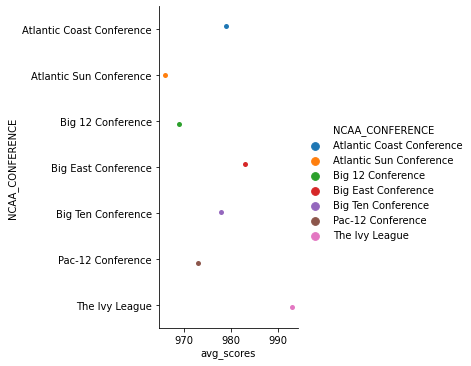

In [228]:
sns.catplot(data=main_conference,x='avg_scores',y='NCAA_CONFERENCE',hue='NCAA_CONFERENCE')

In [20]:
maincon=df.loc([df['NCAA_CONFERENCE']=='American Athletic Conference','Big Ten Conference','Big 12 Conference','Pac-12 Conference','The Ivy League','Southeastern Conference'])

TypeError: unhashable type: 'list'

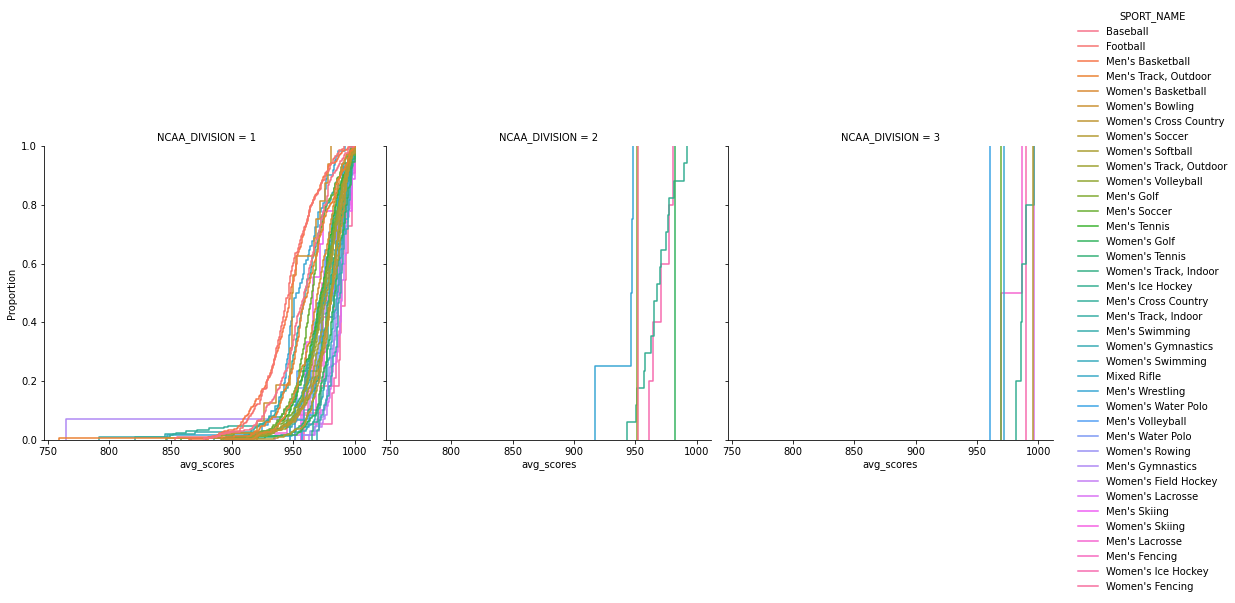

In [21]:

sns.displot(avgscore,x='avg_scores',hue='SPORT_NAME',col='NCAA_DIVISION',kind='ecdf')


In [58]:
sport=(df.groupby(['SPORT_NAME']).mean()) 
sport.drop(['SCHOOL_ID', 'SPORT_CODE', 'NCAA_DIVISION', 'NCAA_SUBDIVISION',
       'FOURYEAR_ATHLETES', 'FOURYEAR_SCORE', 'FOURYEAR_ELIGIBILITY',
       'FOURYEAR_RETENTION', '2014_ATHLETES', '2014_SCORE', '2014_ELIGIBILITY',
       '2014_RETENTION', '2013_ATHLETES', '2013_SCORE', '2013_ELIGIBILITY',
       '2013_RETENTION', '2012_ATHLETES', '2012_SCORE', '2012_ELIGIBILITY',
       '2012_RETENTION', '2011_ATHLETES', '2011_SCORE', '2011_ELIGIBILITY',
       '2011_RETENTION', '2010_ATHLETES', '2010_SCORE', '2010_ELIGIBILITY',
       '2010_RETENTION', '2009_ATHLETES', '2009_SCORE', '2009_ELIGIBILITY',
       '2009_RETENTION', '2008_ATHLETES', '2008_SCORE', '2008_ELIGIBILITY',
       '2008_RETENTION', '2007_ATHLETES', '2007_SCORE', '2007_ELIGIBILITY',
       '2007_RETENTION', '2006_ATHLETES', '2006_SCORE', '2006_ELIGIBILITY',
       '2006_RETENTION', '2005_ATHLETES', '2005_SCORE', '2005_ELIGIBILITY',
       '2005_RETENTION', '2004_ATHLETES', '2004_SCORE', '2004_ELIGIBILITY',
       '2004_RETENTION'],axis=1,inplace=True) 
sport=sport.round(2)

sport.index 
main_sports=sport.drop(["Men's Cross Country",
       "Men's Fencing","Men's Gymnastics", 
       "Men's Skiing",
        "Men's Water Polo", "Men's Wrestling",
       "Mixed Rifle", 
       "Women's Cross Country", "Women's Fencing",
      "Women's Gymnastics",
      "Women's Rowing", "Women's Skiing",
       "Women's Water Polo"])
main_sports.index=["Men's Baseball", "Men's Football", "Men's Basketball", "Men's Golf",
       "Men's Ice Hockey", "Men's Lacrosse", "Men's Soccer", "Men's Swimming",
       "Men's Tennis", "Men's Track, Indoor", "Men's Track, Outdoor",
       "Men's Volleyball", "Women's Basketball", "Women's Bowling",
       "Women's Field Hockey", "Women's Golf", "Women's Ice Hockey",
       "Women's Lacrosse", "Women's Soccer", "Women's Softball",
       "Women's Swimming", "Women's Tennis", "Women's Track, Indoor",
       "Women's Track, Outdoor", "Women's Volleyball"]

In [59]:
main_sports


,avg_scores
Men's Baseball,956.75
Men's Football,945.74
Men's Basketball,946.41
Men's Golf,971.60
Men's Ice Hockey,978.30
Men's Lacrosse,973.12
Men's Soccer,964.78
Men's Swimming,970.09
Men's Tennis,970.05
"Men's Track, Indoor",960.18


In [ ]:
all_men=pd.DataFrame(sport.filter(like="Men's",axis=0))
all_men.reset_index(inplace=True)
all_women=pd.DataFrame(sport.filter(like="Women's",axis=0))
all_women.reset_index(inplace=True)

In [83]:
all_men=pd.DataFrame(sport.filter(like="Men's",axis=0))
all_men.reset_index(inplace=True)
all_women=pd.DataFrame(sport.filter(like="Women's",axis=0))
all_women.reset_index(inplace=True)
main_men=pd.DataFrame(main_sports.filter(like="Men's",axis=0))
main_men.reset_index(inplace=True)
main_women=pd.DataFrame(main_sports.filter(like="Women's",axis=0))
main_women.reset_index(inplace=True)
all_men


,SPORT_NAME,avg_scores
0,Men's Basketball,946.41
1,Men's Cross Country,968.15
2,Men's Fencing,980.20
3,Men's Golf,971.60
4,Men's Gymnastics,964.49
5,Men's Ice Hockey,978.30
6,Men's Lacrosse,973.12
7,Men's Skiing,972.44
8,Men's Soccer,964.78
9,Men's Swimming,970.09


In [84]:
main_women

,index,avg_scores
0,Women's Basketball,968.12
1,Women's Bowling,954.11
2,Women's Field Hockey,986.42
3,Women's Golf,982.27
4,Women's Ice Hockey,984.28
5,Women's Lacrosse,987.75
6,Women's Soccer,979.17
7,Women's Softball,974.78
8,Women's Swimming,983.08
9,Women's Tennis,978.58


In [91]:
mainMW=pd.concat([main_men,main_women]).reset_index(drop=True)
sns.mainMW


AttributeError: module 'seaborn' has no attribute 'mainMW'

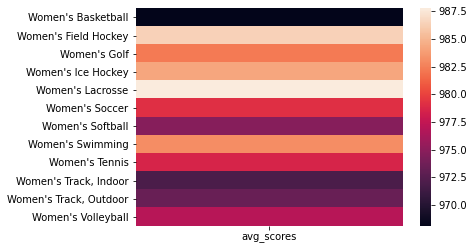

In [47]:
az = sns.heatmap(main_women)

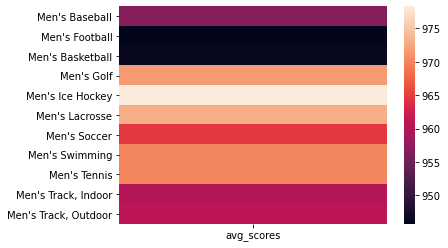

In [46]:
ax = sns.heatmap(main_men) 

In [ ]:
sns.displot(df,x='avg_scores',kind="hist",bins=3,hue='NCAA_DIVISION')

In [ ]:
div=df.reset_index().pivot_table('avg_scores','SPORT_NAME','NCAA_DIVISION')
sns.heatmap(div)

In [ ]:
sns.displot(df,x='FOURYEAR_ATHLETES',kind="kde",hue='NCAA_DIVISION') 


In [ ]:
df['avg_scores'].min()

# Hi Jack